In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
volume = [0, 0.25, 0.5, 1, 1.5, 2.0, 2.5]
absorbance = [-0.112, -0.157, -0.008, -0.110, -0.070, -0.073, -0.447]

volume_shit = np.array(volume)
absorbance_shit = np.array(absorbance)

shift =  min(absorbance_shit)
volume = volume_shit[:-1]
absorbance = (absorbance_shit -shift)[:-1]

In [77]:
(m1, b1), cov1 = np.polyfit(volume_shit, absorbance_shit, 1, cov = True) 

dm1 = cov1[0, 0] ** 0.5
db1 = cov1[1, 1] ** 0.5

(m2, b2), cov2 = np.polyfit(volume, absorbance, 1, cov = True) 

dm2 = cov2[0, 0] ** 0.5
db2 = cov2[1, 1] ** 0.5

print(m1, dm1, b1 - shift, db1)
print(m2, dm2, b2, db2)

-0.08410921501706485 0.07402840909278949 0.4005494880546075 0.10398855461449302
0.02004210526315786 0.04415633102640841 0.3411298245614035 0.049573553300391086


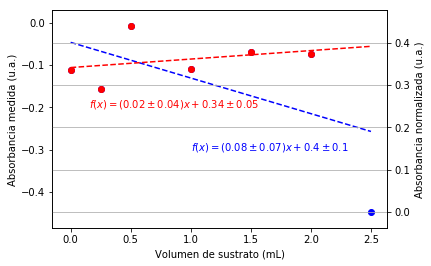

In [92]:
fig, ax = plt.subplots()

ax.text(1.0, -0.3, "$f(x) = (0.08 \pm 0.07) x + 0.4\pm0.1$", color = "b")
ax.text(0.15, -0.2, "$f(x) = (0.02 \pm 0.04) x + 0.34\pm0.05$", color = "r")

ax1 = ax.twinx()
ax.scatter(volume_shit, absorbance_shit, c = "b", alpha = 1)
ax.plot(volume_shit, m1 * volume_shit + b1, "--", c = "b")
ax1.scatter(volume, absorbance, c = 'r', alpha = 1)
ax1.plot(volume_shit, m2 * volume_shit + b2, "--", c = "r")

ax.set_xlabel("Volumen de sustrato (mL)")
ax.set_ylabel("Absorbancia medida (u.a.)")

ax1.set_ylabel("Absorbancia normalizada (u.a.)")
ax1.grid()

lims = np.array(ax.get_ylim()) - shift

ax1.set_ylim(lims)

fig.savefig("sustrato.png", dpi = 300)
plt.show()
